# Exercício - Hierarquia de Clustering

Neste exercício, temos perfis de clientes de um shopping e, para entender melhor cada um, é necessário analisar os dados em busca de insights. Nesse caso, faremos uma clusterização com o método da Hierarquia de Clustering para dizer qual é o perfil médio de dos clientes de cada cluster.

## 1. Carregando os Dados

Importando a biblioteca necessária para carregar o banco de dados:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

Carregando e exibindo o banco de dados:

In [2]:
df = pd.read_csv(r'C:\Users\arnon\Documents\DNC\Exercícios\Clustering - Modelos Não Supervisionados I\Exercício - DBSCAN\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Como a coluna "CustomerID" não provê nenhuma informação relevante, retiraremos ela da análise:

In [3]:
df.drop(columns = 'CustomerID', inplace = True)

Descrição das _features_ do _dataset_:

* __Genre__: sexo do cliente
* __Age__: idade do cliente
* __Annual Income (k$)__: renda anual do cliente
* __Spending Score (1-100)__: pontuação de gastos do cliente (variando de 0 a 100)

## 2. Análise Preliminar dos Dados

Tamanho do banco de dados:

In [4]:
df.shape

(200, 4)

Percentual de nulos de cada coluna:

In [5]:
df.isnull().sum()*100/len(df)

Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

Tipos de dados:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Análise descritiva dos dados:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


## 3. Tratando a Coluna Categórica

Nesta etapa, iremos modificar o banco de dados para aplicar uma releitura da coluna "Genre". Para isso, utilizaremos o método "get dummies":

In [8]:
df = pd.get_dummies(data = df, prefix = '', prefix_sep = '', drop_first = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## 4. Análise Gráfica dos Dados

Como agora todas as variáveis do _dataset_ são numéricas, podemos plotar os gráficos sem realizar nenhuma separação prévia das colunas.

Importando as bibliotecas necessárias para plotar a matriz de correlação:

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Matriz de correlação:

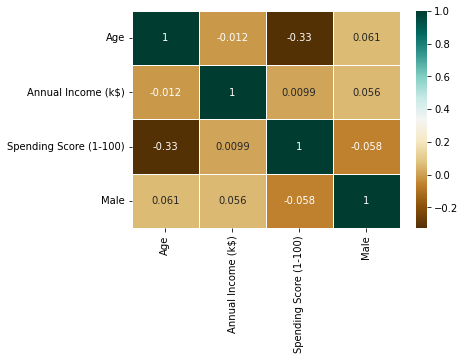

In [10]:
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, cmap = 'BrBG')
plt.show()

A matriz de correlação não foi capaz de prover nenhum _insight_.

Histogramas:

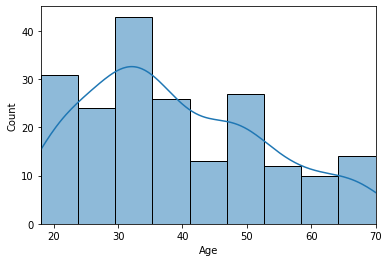

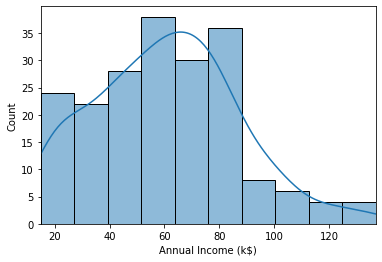

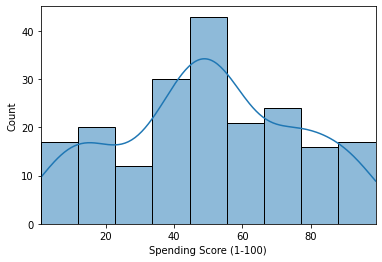

In [11]:
for i in df:
    if i != 'Male':
        fig, ax = plt.subplots()
        sns.histplot(df[i], ax = ax, kde = True)
        ax.set_xlim(left = df[i].min(), right = df[i].max())
        plt.show()

Pela análise dos gráficos acima, é possível observar que os dados não seguem uma distribuição normal.

Gráficos de _boxplot_:

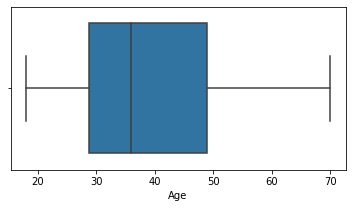

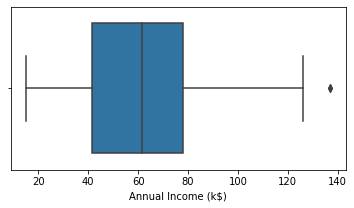

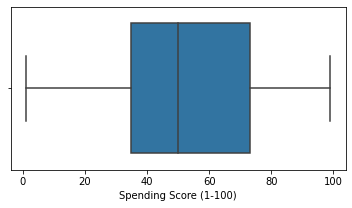

In [12]:
for i in df:
    if i != 'Male':
        plt.figure(figsize = (6,3))
        sns.boxplot(x = df[i])
        plt.show()

Como a quantidade de _outliers_ é desprezível, não será necessário nenhum tratamento para eles.

## 5. Normalizando os Dados

Importando a bibliteca necessária:

In [13]:
from sklearn.preprocessing import StandardScaler

Normalizando o banco de dados e exibindo o resultado:

In [14]:
df_scaled = StandardScaler().fit_transform(df.loc[:, df.columns != 'Male'])
df_scaled = pd.DataFrame(df_scaled, columns = df.loc[:, df.columns != 'Male'].columns)
df_scaled['Male'] = df['Male']
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


## 6. Definindo o Número de Clusters

Importando a bibliteca necessária:

In [15]:
import scipy.cluster.hierarchy as sch

Plotando o dendograma:

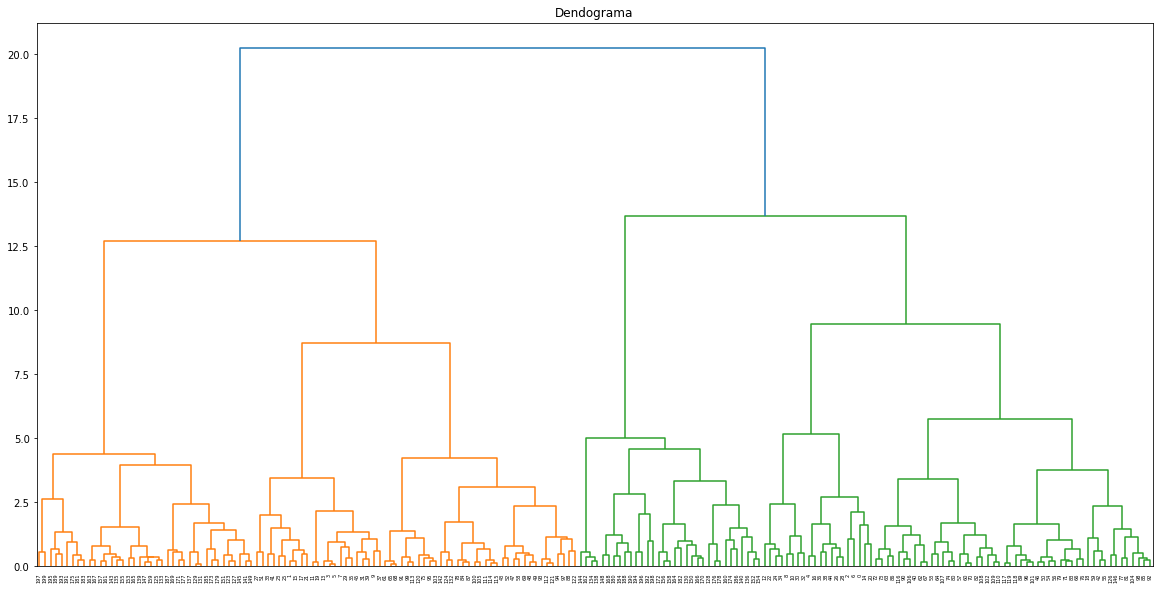

In [16]:
plt.figure(figsize = (20,10))
sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendograma')
plt.show()

Iremos utilizar 3 _clusters_.

## 7. _Clusterização_

Importando as bibliotecas:

In [17]:
from sklearn.cluster import AgglomerativeClustering

Aplicando o modelo:

In [18]:
model = AgglomerativeClustering(3, affinity = 'euclidean', linkage = 'ward')
clusters = model.fit_predict(df_scaled)
df['cluster'] = clusters.astype('str')

Verificando a quantidade de ocorrências de cada cluster:

In [19]:
df['cluster'].value_counts()

0    97
1    70
2    33
Name: cluster, dtype: int64

## 8. Resultados

Criando uma lista com as combinações das colunas (exceto as colunas "cluster" e "Male") e exibindo o resultado:

In [20]:
from itertools import combinations
combinacoes = list(combinations(df[df.columns[~df.columns.isin(['cluster', 'Male'])]].columns, 2))
combinacoes

[('Age', 'Annual Income (k$)'),
 ('Age', 'Spending Score (1-100)'),
 ('Annual Income (k$)', 'Spending Score (1-100)')]

Visualizando a distribuição dos _clusters_:

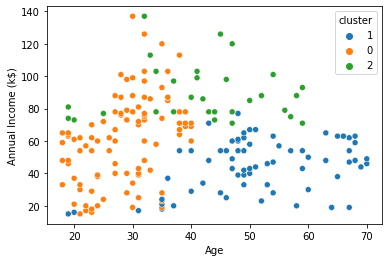

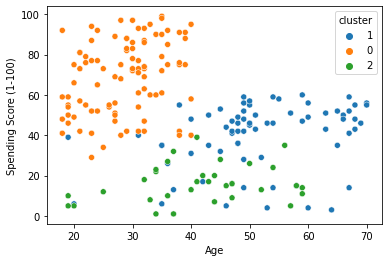

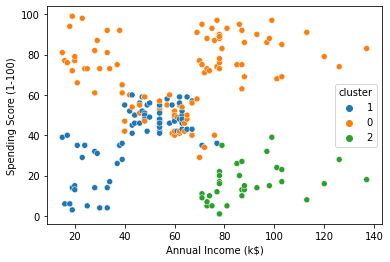

In [21]:
for i in combinacoes:
    plt.figure()
    sns.scatterplot(data = df, x = i[0], y = i[1], hue = 'cluster')
    plt.show()

## 9. Conclusão

Observando os resultados obtidos acima, entedemos que podemos dividir a amostra disponibilizada em 3 _clusters_.

Na divisão, o cluster 0 seria composto por clientes com a mais alta média de pontuação de gastos, rendimento anual variado e idade inferior a 40 anos.

O cluster 1 teria sua composição formada por clientes de idades variadas, pontuação de gastos média para pequena e rendimento anual baixo.

Por fim, no cluster 2, teríamos clientes com rendimento alto, pontuação de gastos baixa e que têm idades variadas.